**SVM with COLORED MNIST DATASET**

In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

In [2]:
#get MNIST Dataset
(train_dataset, train_labels),(test_dataset,test_labels)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Control for MNIST Dataset
n_train = len(train_dataset)
n_test=len(test_dataset)
print("Size of Train Dataset:",n_train)
print("Size of Test Dataset:",n_test)
print(train_dataset.shape)

Size of Train Dataset: 60000
Size of Test Dataset: 10000
(60000, 28, 28)


In [4]:
x_train = np.zeros((train_dataset.shape[0], train_dataset.shape[1], train_dataset.shape[2],3)).astype(np.uint8)
x_test =  np.zeros((test_dataset.shape[0], test_dataset.shape[1], test_dataset.shape[2],3)).astype(np.uint8)
s_train = np.zeros(train_dataset.shape[0]).astype(np.uint8)
s_test = np.zeros(test_dataset.shape[0]).astype(np.uint8)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [8]:
# Creating color mnist dataset according to array separation in train and test dataset

train_idx = np.random.permutation(60000)


x_train[train_idx[:25000], :, :, 0] = train_dataset[train_idx[:25000]]
x_train[train_idx[25000:45000], :, :, 1] = train_dataset[train_idx[25000:45000]]
x_train[train_idx[45000:55000], :, :, 2] = train_dataset[train_idx[45000:55000]]

s_train[train_idx[0:25000]] = 0
s_train[train_idx[25000:45000]] = 1
s_train[train_idx[45000:55000]] = 2


test_idx = np.random.permutation(10000)

x_test[test_idx[0:3000], :, :, 0] = test_dataset[test_idx[0:3000], :, :]
x_test[test_idx[3000:5000], :, :, 1] = test_dataset[test_idx[3000:5000], :, :]
x_test[test_idx[5000:7500], :, :, 2] = test_dataset[test_idx[5000:7500], :, :]

s_test[test_idx[0:2500]] = 0
s_test[test_idx[2500:5000]] = 1
s_test[test_idx[5000:7500]] = 2


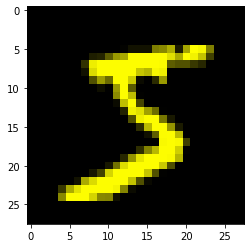

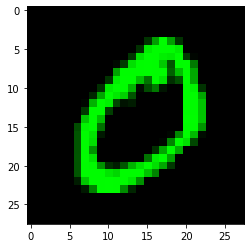

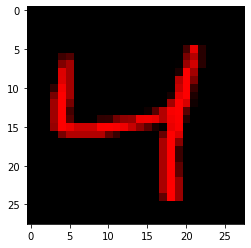

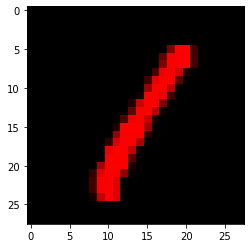

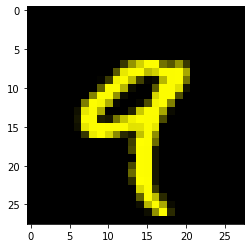

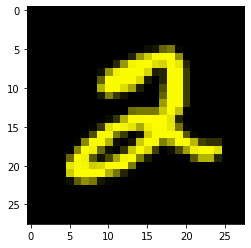

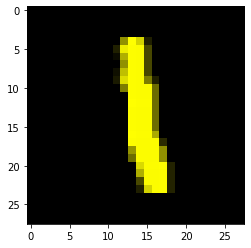

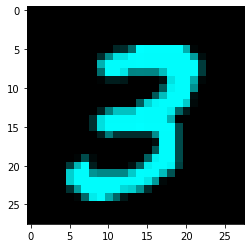

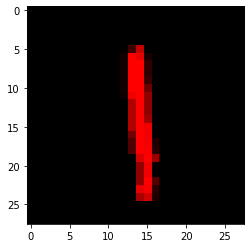

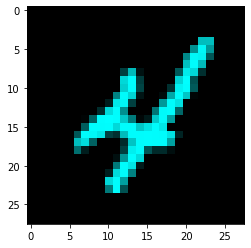

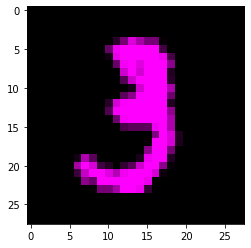

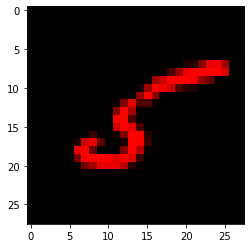

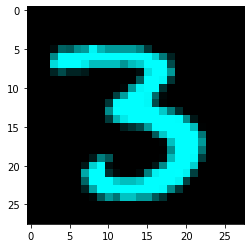

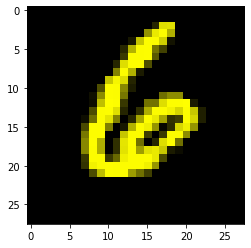

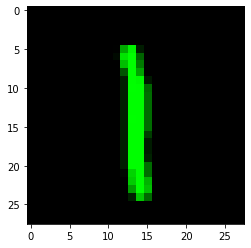

In [9]:
for i in range(15):
  plt.imshow(x_train[i])
  plt.show()


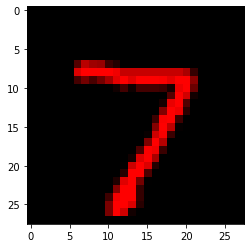

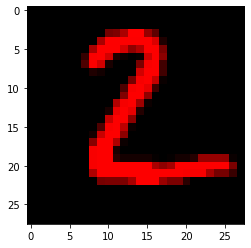

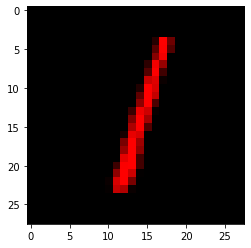

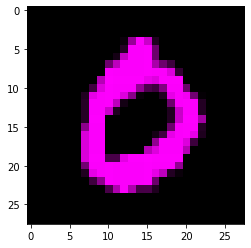

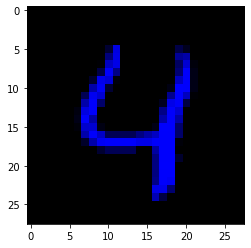

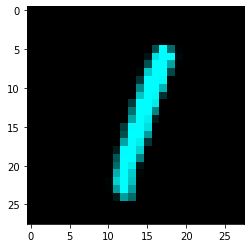

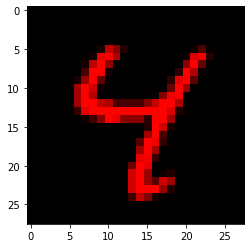

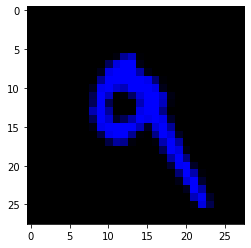

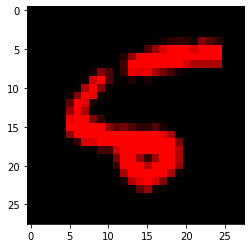

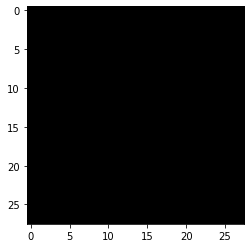

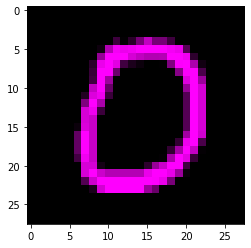

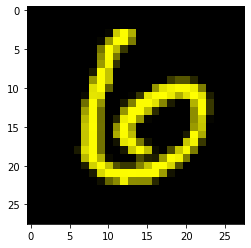

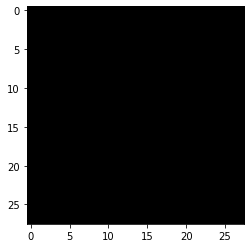

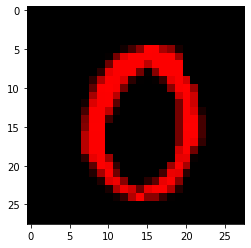

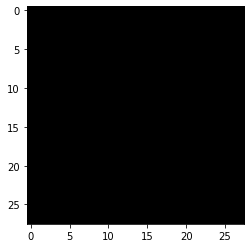

In [12]:
for i in range(15):
  plt.imshow(x_test[i])
  plt.show()

In [10]:
#Formatting and normalization
train_dataset = (train_dataset.reshape([-1,784]))/255.0
test_dataset = (test_dataset.reshape([-1,784]))/255.0
#SVM
svm = LinearSVC(dual=False,random_state=0,C=1.0)
svm.fit(test_dataset,test_labels)

LinearSVC(dual=False, random_state=0)

In [11]:
#Accuracy
prediction=svm.predict(test_dataset)
print("accuracy:",accuracy_score(test_labels,prediction))

accuracy: 0.9722
